In [2]:
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
from optimizers import *
from topology import *
from dp_account import *
from utils import *

In [2]:
zeta, sigma, sigma_cor = 0, 0, 0
num_nodes, num_dim = 512, 16
np.random.seed(123)
A, B = generate_functions(num_nodes, num_dim, zeta)

In [3]:
num_iter = 750
num_gossip = 1
gamma = 0.01
X = np.ones(shape=(num_dim, num_nodes))
W_ring = FixedMixingMatrix("ring", num_nodes)
W_centr = FixedMixingMatrix("centralized", num_nodes)

In [4]:
#sigma, sigma_cor, c_clip = np.sqrt(num_iter/num_nodes), np.sqrt(num_iter), 1
sigma, sigma_cor, c_clip = 10, np.sqrt(num_iter), 1
adjacency_matrix = np.array(W_ring(0) != 0, dtype=float)
adjacency_matrix = adjacency_matrix - np.diag(np.diag(adjacency_matrix))
degree_matrix = np.diag(adjacency_matrix @ np.ones_like(adjacency_matrix[0]))

# eps_rdp_iteration = rdp_account(sigma, sigma_cor, c_clip, degree_matrix, adjacency_matrix, sparse=False, precision=0.1)
eps_rdp_iteration = rdp_account(sigma, sigma_cor, c_clip, degree_matrix, adjacency_matrix)

sigma_ldp = c_clip * np.sqrt(2/eps_rdp_iteration)
print("eps_rdp_iteration: {}".format(eps_rdp_iteration))
print("sigmacdp: {}, sigmaldp: {}".format(sigma, sigma_ldp))
print("sigmacor: {}".format(sigma_cor))

eps_rdp_iteration: 0.003592106040535499
sigmacdp: 10, sigmaldp: 23.596110617705666
sigmacor: 27.386127875258307


In [6]:
def constant_prop(eps, n, sigma_cdp, sigma_cor):
    cdp = 1 / (n * sigma_cdp**2)
    cor = n**2 / (sigma_cor**2)
    return eps / (cdp + cor)
n = 256
eps = 0.00814
sigmacor = 24.42
sigmacdp = 5
print(constant_prop(eps, n, sigmacdp, sigmacor))

7.406877738116252e-05


In [7]:
t = np.linspace(1, 100, 1000)
for x in t: 
    print("yes")

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [16]:
# eps, delta = 25, 1 / (num_nodes ** 2)
# c_clip = 1
#
# alg_con = {"ring": 2 * (1 - np.cos(2 * np.pi / num_nodes))}
#
# sigma = np.sqrt(32 * (c_clip ** 2) * num_iter * np.log(1/delta) / (num_nodes * (eps ** 2)))
# sigma_ldp = np.sqrt(32 * (c_clip ** 2) * num_iter * np.log(1/delta) / (eps ** 2))
# sigma_cor = np.sqrt(32 * (c_clip ** 2) * num_iter * np.log(1/delta) / (alg_con["ring"] * (eps ** 2)))
#
# print(sigma, sigma_cor, sigma_ldp)
# print(1/alg_con["ring"])

In [17]:
errors_centr, _ = optimize_decentralized_correlated(X, W_centr, A, B, gamma, sigma, sigma_cor, c_clip, num_gossip=num_gossip, num_iter=num_iter)
errors_cor, _ = optimize_decentralized_correlated(X, W_ring, A, B, gamma, sigma, sigma_cor, c_clip, num_gossip=num_gossip, num_iter=num_iter)
errors_ldp, _ = optimize_decentralized_correlated(X, W_ring, A, B, gamma, sigma_ldp, 0, c_clip, num_gossip=num_gossip, num_iter=num_iter)

Text(0, 0.5, 'distance to optimum $x^\\star$')

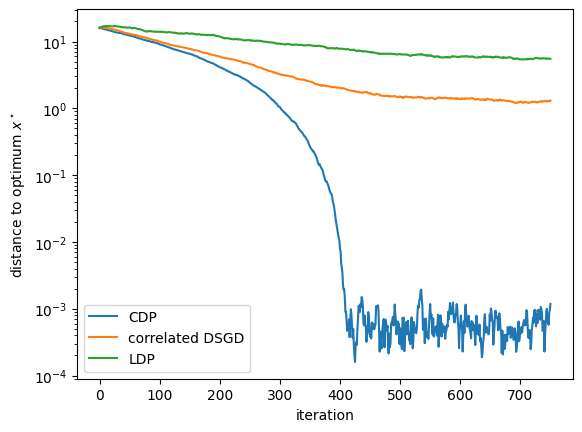

In [18]:
plt.semilogy(errors_centr, label="CDP")
plt.semilogy(errors_cor, label="correlated DSGD")
plt.semilogy(errors_ldp, label="LDP")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("distance to optimum $x^\star$")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$\\varepsilon$')

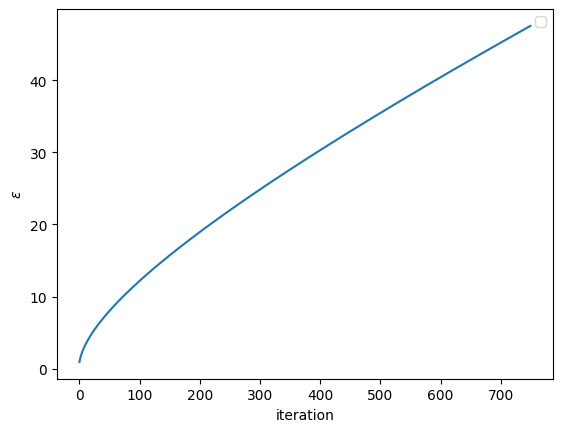

In [8]:
delta = 1 / (num_nodes ** 1.1)
eps = [rdp_compose_convert(i, eps_rdp_iteration, delta) for i in range(1, num_iter+1)]
plt.plot(eps)
plt.legend()
plt.xlabel("iteration")
plt.ylabel("$\\Yvarepsilon$")

In [9]:
# plt.semilogy(errors_centr, label="CDP")
# plt.semilogy(errors_cor, label="correlated DSGD")
# plt.semilogy(errors_ldp, label="LDP")
# plt.legend()
# plt.xlabel("iteration")
# plt.ylabel("distance to optimum $x^\star$")

In [10]:
# X = np.ones(shape=(num_dim, num_nodes))
# W_ring = FixedMixingMatrix("centralized", num_nodes)

In [11]:
# errors, _ = optimize_decentralized_correlated(X, W_ring, A, B, gamma, sigma, sigma_cor, num_iter=num_iter)

In [12]:
# X = np.ones(shape=(num_dim, num_nodes))
# W_ring = FixedMixingMatrix("centralized", num_nodes)

In [13]:
# errors_uncorr, _ = optimize_decentralized_correlated(X, W_ring, A, B, gamma, sigma, sigma_cor, num_iter=num_iter, uncorrelate=True)

In [14]:
# plt.semilogy(errors_uncorr, label="uncorr")
# plt.semilogy(errors, label="corr")
# plt.legend()

In [15]:
def test_ratio_n(n):
    out = {}
    topos = ['ring', 'avg_two_ring']

    for top in topos:
        out_top = []

        for k in range(2, n):
            W = FixedMixingMatrix(top, 2 * k)(0)
            mixing_heterogeneity = sum([0.5 * np.linalg.norm(W[:, i] - W[:, j], 2) ** 2 for i in range(k)
                                    for j in range(k) if W[i, j] != 0])
            naive_bound = sum([1 for i in range(k)
                                    for j in range(k) if W[i, j] != 0])
            ratio = mixing_heterogeneity / naive_bound
            # ratio = naive_bound / mixing_heterogeneity
            out_top.append(1 / (1-ratio))
            # out_top.append(mixing_heterogeneity)
        out[top] = out_top

    for top in topos:
        # plt.yscale('log')
        plt.plot([2 * k for k in range(2, n)], out[top], label=top)

    plt.legend()

def test_ratio_tau(tau, n=10):
    out = {}
    topos = ['ring', 'avg_two_ring']

    for top in topos:
        out_top = []

        for t in range(1, tau):
            W = FixedMixingMatrix(top, n)(0) ** t
            mixing_heterogeneity = sum([0.5 * np.linalg.norm(W[:, i] - W[:, j], 2) ** 2 for i in range(n)
                                    for j in range(n) if W[i, j] != 0])
            naive_bound = sum([1 for i in range(n)
                                    for j in range(n) if W[i, j] != 0])
            ratio = mixing_heterogeneity / naive_bound
            # ratio = naive_bound / mixing_heterogeneity
            out_top.append(ratio)
            # out_top.append(mixing_heterogeneity)
        out[top] = out_top

    for top in topos:
        plt.yscale('log')
        plt.plot(range(1, tau), out[top], label=top)

    plt.legend()

# test_ratio_tau(100)
# test_ratio_n(200)

In [16]:
# errors_uncorr, _ = optimize_decentralized_correlated(X, W_ring, A, B, gamma, sigma, sigma_cor, num_iter=num_iter, uncorrelate=True)